In [5]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np

In [10]:
df = pd.read_csv('Experiments_result_analysis/mdf_rdkit_dash_features_2980.csv')
df_low_vp = df[df['vp'] < -10]
df_low_vp = df_low_vp.sort_values(by=['vp'])
df_low_vp
mols_low_vp = [Chem.MolFromMolBlock(mol) for mol in df_low_vp['molblock']]
vps_low_vp = df_low_vp['vp'].tolist()
#draw first 50 molecules, legend is the vp value
# Draw.MolsToGridImage(mols_low_vp[:50], molsPerRow=5, subImgSize=(300, 300), legends=[f'VP: {(np.round(vp,2))} [log10 Pa]' for vp in vps_low_vp[:50]])

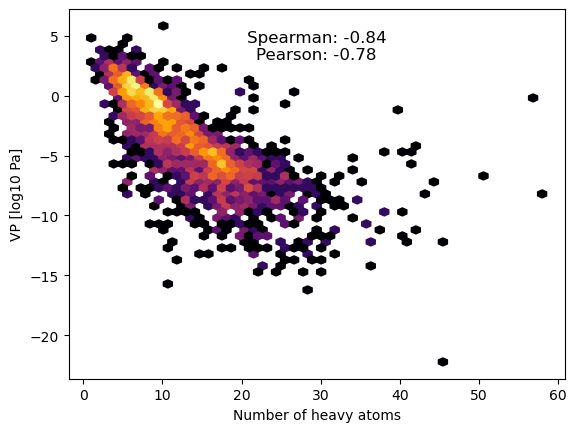

In [21]:
#plot vp against number of heavy atoms
import matplotlib.pyplot as plt
plt.hexbin(df['NumHeavyAtoms'], df['vp'], gridsize=50, cmap='inferno', bins='log', mincnt=1)
#add R2, pearson and spearman correlation as text
spearman = df['NumHeavyAtoms'].corr(df['vp'], method='spearman')
pearson = df['NumHeavyAtoms'].corr(df['vp'], method='pearson')
plt.text(0.5, 0.9, f'Spearman: {np.round(spearman, 2)}\nPearson: {np.round(pearson, 2)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Number of heavy atoms')
plt.ylabel('VP [log10 Pa]')
plt.show()

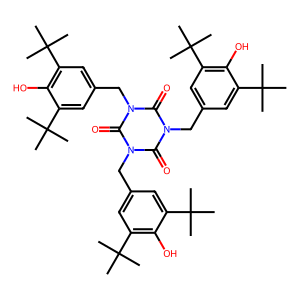

In [26]:
#get the molblock for row with second highest NumHeavyAtoms
molblock = df.sort_values(by=['NumHeavyAtoms'], ascending=False).iloc[1]['molblock']
mol = Chem.MolFromMolBlock(molblock)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (300,300)
mol

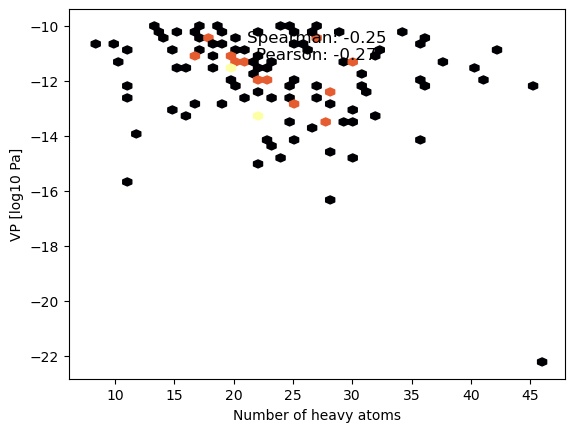

In [22]:
#plot vp against number of heavy atoms
import matplotlib.pyplot as plt
plt.hexbin(df_low_vp['NumHeavyAtoms'], df_low_vp['vp'], gridsize=50, cmap='inferno', bins='log', mincnt=1)
#add R2, pearson and spearman correlation as text
spearman = df_low_vp['NumHeavyAtoms'].corr(df_low_vp['vp'], method='spearman')
pearson = df_low_vp['NumHeavyAtoms'].corr(df_low_vp['vp'], method='pearson')
plt.text(0.5, 0.9, f'Spearman: {np.round(spearman, 2)}\nPearson: {np.round(pearson, 2)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Number of heavy atoms')
plt.ylabel('VP [log10 Pa]')
plt.show()